Start Time: January 23, 2024
End Time: 

In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn import linear_model
import matplotlib.pyplot as plt
import random

# 1. Two-dimention data

## 1.1 Create data and visualization

the intercept is -0.5986275849892874 and the coefficient is 0.53376686590539


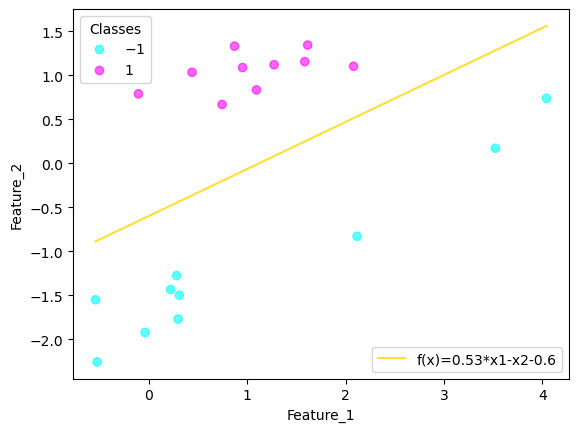

In [2]:
# two-dimention data
td_data = make_classification(n_samples=20, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=24)

td_data = list(td_data)
td_data[1] = np.array([1 if i == 0 else -1 for i in td_data[1]])
td_data = tuple(td_data)

# visualized data
fig, ax = plt.subplots()
scatter = ax.scatter(td_data[0][:, 0], td_data[0][:, 1], c=td_data[1], alpha=0.6, cmap="cool")
legend_1 = ax.legend(*scatter.legend_elements(), title="Classes", loc="upper left")
ax.add_artist(legend_1)
ax.set_xlabel("Feature_1")
ax.set_ylabel("Feature_2")

# add minimal residual sum of squares line as gold standard
reg = linear_model.LinearRegression()

# reshape for model fitting
reg.fit(td_data[0][:, 0].reshape(-1, 1), td_data[0][:, 1].reshape(-1, 1))
print(f"the intercept is {reg.intercept_[0]} and the coefficient is {reg.coef_[0][0]}")
formula = f"f(x)={round(reg.coef_[0][0], 2)}*x1-x2{round(reg.intercept_[0], 2)}"

# create a x axis for plotting
create_x_axis = np.linspace(min(td_data[0][:, 0]), max(td_data[0][:, 0]), 100).reshape(-1, 1)
predicted_value = reg.predict(create_x_axis)

ax.plot(create_x_axis, predicted_value, c="gold", alpha=0.8, label=formula)
handles, labels = ax.get_legend_handles_labels()
legend_2 = ax.legend(handles, labels, loc="lower right")

plt.show()

In [34]:
decision_funtion(0.53, -1, -0.6)

[-1.30062004 -0.82501287 -1.351834   -1.06281152 -0.59869522 -1.40060898
 -1.32725165 -0.95138752 -1.18234075 -1.09707419 -1.46835772 -1.08652719
 -1.04421118 -1.44436223 -1.37721529 -0.87320283 -0.85344537 -0.66323849
 -0.91413845 -0.80580311]


[True, array([-0.03930341, -1.92145085]), -1]

In [ ]:
td_data[1] *

## 1.2 manually fit data

The loss function 
$$
\min\mathbf{L}\mathcal{(\omega, b)} = -\sum_{x_{i}} \mathcal{y_{i}(\omega\cdot x_{i} + b)}
$$

In [25]:
# take the partial derivative of w and b
def partial_derivative_w(data_point, label_point):
    # feature_1 * feature_2 * y
    result_w_1 = data_point[0] * label_point
    result_w_2 = data_point[1] * label_point
    return [result_w_1, result_w_2]

def partial_derivative_b(label_point):
    # label
    result_b = label_point
    return result_b

# decision function. w and b will be change if exist data point make 
def decision_funtion(weight_1, weight_2, intercept):
    # if y*(w*x+b) < 0, the data point is wrongly classified.
    result = td_data[1] * ((td_data[0][:, 0] * weight_1) + (td_data[0][:, 1] * weight_2) + intercept)

    if len(result[np.where(result < 0)]) != 0:
        print(result)
        wrong_dp_index = np.where(result == result[np.where(result < 0)][0])[0][0]
        wrong_dp = td_data[0][wrong_dp_index]
        wrong_lb = td_data[1][wrong_dp_index]
        return [True, wrong_dp, wrong_lb]
    else:
        print(result)
        print("interation end")
        return [False, None, None]

def plot_function(weight_1, weight_2, intercept, feature_point):
    # create object
    fig, ax = plt.subplots()
    # plot scatter
    scatter = ax.scatter(td_data[0][:, 0], td_data[0][:, 1], c=td_data[1], alpha=0.6)
    ax.legend(*scatter.legend_elements(), title="Classes")
    ax.set_xlabel("Feature_1")
    ax.set_ylabel("Feature_2")
    # plot wrong classification point
    ax.scatter(feature_point[0], feature_point[1], color='red')
    # plot classificated hyperplane
    b = intercept/weight_2
    hyperplane = [(-(weight_1/weight_2) * i) - b for i in create_x_axis]
    ax.plot(create_x_axis, hyperplane, c='green', alpha=0.5)
    plt.show()


[-0.05748121  0.12013351  0.89461681  0.11473833 -1.02232846 -0.35328854
  0.08957862  0.08324157 -0.56508291  1.53682917 -0.54995333 -0.85166353
 -0.69710582 -0.11498133 -0.27933722 -0.44998458 -0.60337418 -0.23357369
 -0.82558016  1.78875261]
The 1 iteration	weight_1=-0.40428339218740067	weight_2=-0.07368988705913815	intercept=-0.1



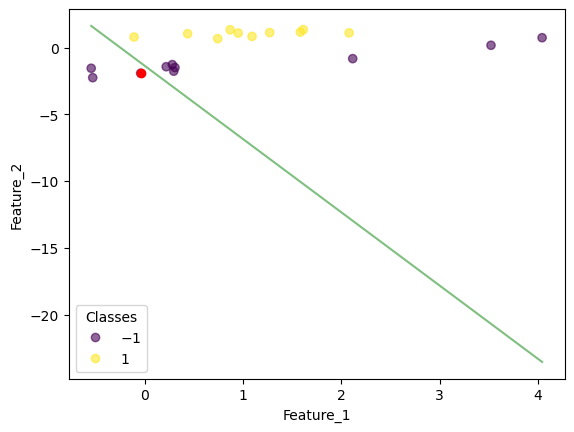

[ 0.4118706   0.46408752  1.14576709  0.50149077 -0.90251665 -0.25310335
  0.52849536  0.45805745 -0.45247198  1.59029495 -0.39102333 -0.68740885
 -0.57711081 -0.06401122  0.25631355 -0.41879725 -0.53904171  0.16652398
 -0.6976412   1.73127139]
The 2 iteration	weight_1=-0.40035305118682757	weight_2=0.11845519768266355	intercept=-0.2



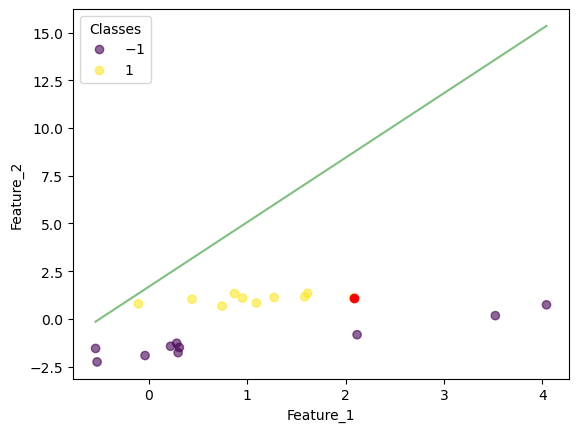

[ 0.5316824   0.44583418  0.69675791  0.50214046 -0.24829979  0.05184392
  0.56168072  0.47029812 -0.03461453  0.73855008  0.03657763 -0.10363156
 -0.08900671  0.10059914  0.51450112 -0.09047061 -0.11983183  0.3501884
 -0.1408925   0.70894294]
The 3 iteration	weight_1=-0.19229002553369662	weight_2=0.2285981229689517	intercept=-0.1



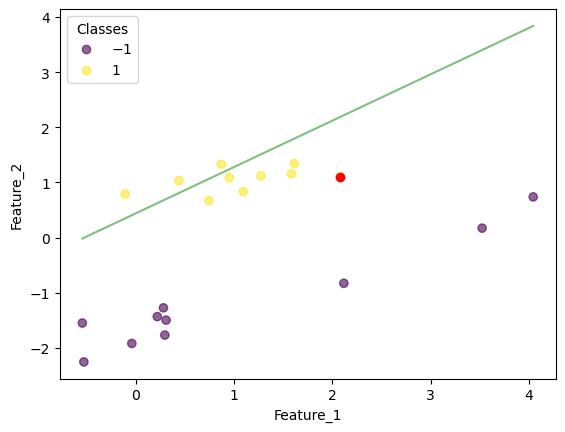

[ 0.65149421  0.42758085  0.24774872  0.50279014  0.40591708  0.35679118
  0.59486609  0.48253879  0.38324293 -0.11319479  0.46417859  0.48014573
  0.39909739  0.2652095   0.77268869  0.23785604  0.29937804  0.53385281
  0.41585621 -0.31338552]
The 4 iteration	weight_1=0.015773000119434333	weight_2=0.3387410482552399	intercept=0.0



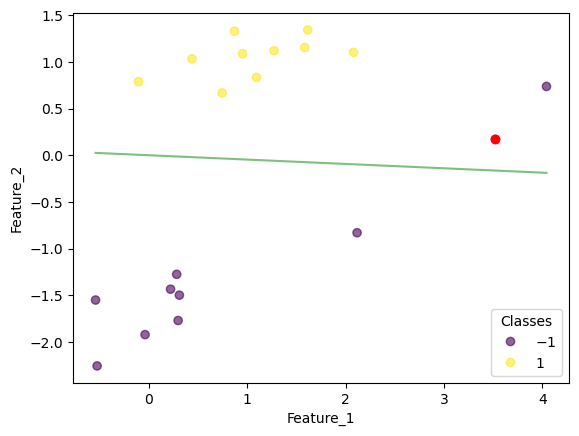

[ 0.70495999  0.60532858  1.07936961  0.68637681 -0.44582779  0.08482538
  0.76933055  0.63565969 -0.07072849  1.23085688  0.03484912 -0.21151036
 -0.16841715  0.1893451   0.64864101 -0.13561807 -0.19995756  0.4163691
 -0.26196258  1.22344365]
The 5 iteration	weight_1=-0.33652766825281905	weight_2=0.32172911284745215	intercept=-0.1



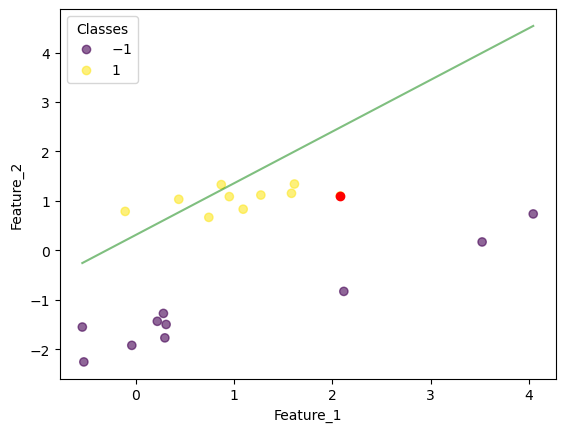

[0.8247718  0.58707525 0.63036042 0.6870265  0.20838907 0.38977265
 0.80251591 0.64790036 0.34712897 0.379112   0.46245009 0.37226693
 0.31968695 0.35395546 0.90682858 0.19270857 0.21925232 0.60003351
 0.29478613 0.2011152 ]
interation end
The 6 iteration	weight_1=-0.1284646425996881	weight_2=0.4318720381337403	intercept=0.0



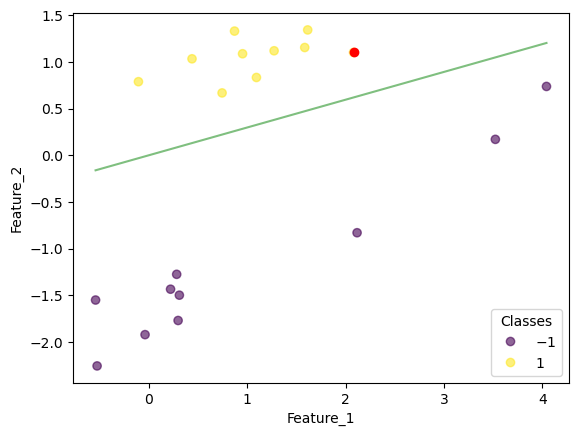

In [30]:
# initiate weight, intercept and learning rate
weight_1 = 0
weight_2 = 0
intercept = 0
learn_rate = 0.1


# iteration times
iteration_times = 1000

# random value in two dimention data
random_index = random.randint(0, 19)
feature_point = td_data[0][random_index]
label_point = td_data[1][random_index]
# it is not correctly classified for any data point resulting in loss function equte 0.

for iteration in range(iteration_times):
    # w1 = w0 + (learn_rate * y * x)
    new_weight_1 = weight_1 + (learn_rate * partial_derivative_w(feature_point, label_point)[0])
    new_weight_2 = weight_2 + (learn_rate * partial_derivative_w(feature_point, label_point)[1])
    # b1 = b0 + learn_rate * y
    new_intercept = intercept + (learn_rate * partial_derivative_b(label_point))
    
    # decision
    decision_condition, wrong_dp, wrong_lp = decision_funtion(new_weight_1, new_weight_2, new_intercept)
    
    if decision_condition:
        weight_1 = new_weight_1
        weight_2 = new_weight_2
        intercept = new_intercept
        # wrong data point
        feature_point = wrong_dp
        label_point = wrong_lp
        print(f"The {iteration + 1} iteration\tweight_1={weight_1}\tweight_2={weight_2}\tintercept={intercept}\n")
        plot_function(weight_1, weight_2, intercept, feature_point)
    else:
        print(f"The {iteration + 1} iteration\tweight_1={new_weight_1}\tweight_2={new_weight_2}\tintercept={new_intercept}\n")
        plot_function(new_weight_1, new_weight_2, new_intercept, feature_point)
        break
    